<a href="https://colab.research.google.com/github/jigjid/github_task/blob/main/Credit_information_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()  


# check function of missing value 
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

[Question 1] Understanding the content of the competition

1.Home Credit is a financial institution that aims to provide loans to people who have insufficient or no credit histories, in order to broaden financial inclusion for the unbanked population.

2.In this competition, Home Credit is challenging Kagglers (participants in a data science competition hosted on the Kaggle platform) to use their expertise to unlock the full potential of the company's data. Specifically, Kagglers are expected to develop machine learning models that can predict clients' repayment abilities using a variety of alternative data, including telco and transactional information. The goal is to ensure that Home Credit is able to lend to clients who are capable of repayment, while minimizing the risk of default.

3.Home Credit can benefit in several ways from predicting their clients' repayment abilities. By accurately assessing a client's creditworthiness, Home Credit can reduce the risk of default and minimize losses. Additionally, by providing loans to clients who are capable of repayment, Home Credit can expand its customer base and increase revenue. Finally, by using alternative data sources, Home Credit can provide loans to people who might not otherwise have access to credit, thereby helping to broaden financial inclusion.

[Problem 2] Understanding the overview of the data

In [18]:
import pandas as pd
train= pd.read_csv("application_train.csv")
print(train.info())
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(85), int64(21), object(16)
memory usage: 3.6+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3859,104515,0,Cash loans,M,N,N,0,112500.0,270000.0,16645.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3860,104516,1,Cash loans,F,N,Y,0,90000.0,900000.0,32017.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3861,104517,0,Cash loans,F,N,Y,0,78750.0,614574.0,17968.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3862,104518,0,Cash loans,F,Y,Y,0,270000.0,855000.0,27711.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


In [19]:
missing_values = train
print(missing_values)
print(missing_values.isnull())
     

      SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0         100002       1         Cash loans           M            N   
1         100003       0         Cash loans           F            N   
2         100004       0    Revolving loans           M            Y   
3         100006       0         Cash loans           F            N   
4         100007       0         Cash loans           M            N   
...          ...     ...                ...         ...          ...   
3859      104515       0         Cash loans           M            N   
3860      104516       1         Cash loans           F            N   
3861      104517       0         Cash loans           F            N   
3862      104518       0         Cash loans           F            Y   
3863      104519       0         Cash loans           F            N   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  Y             0          202500.0  

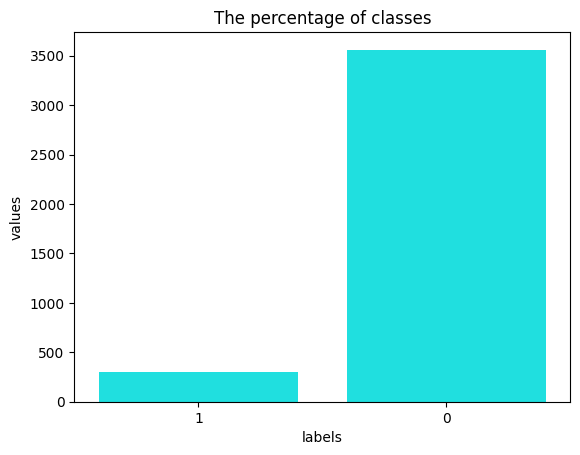

In [20]:

temp = train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values})
plt.title('The percentage of classes')
sns.barplot(x = 'labels', y="values", data=df, order = [1,0], color='cyan')
plt.show()


Problem 3] Defining issues

1.Dataset is an unbalanced

2.Almost half of feature has missing values about 50 percent

3.Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. In terms of percentage of not repayment of loan, lower secondarty has the highest percent of not repayment, with academic the lowest.


[Problem 4] Data exploration

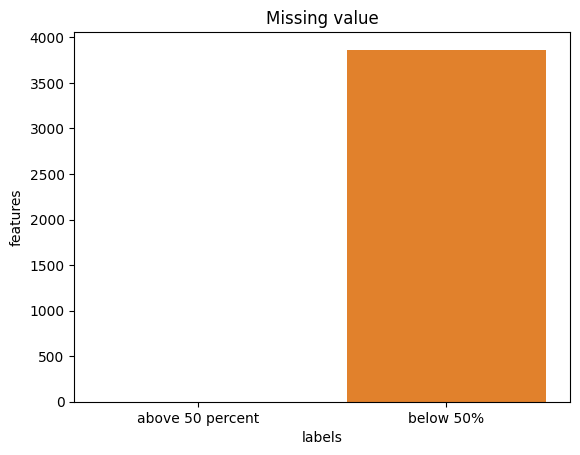

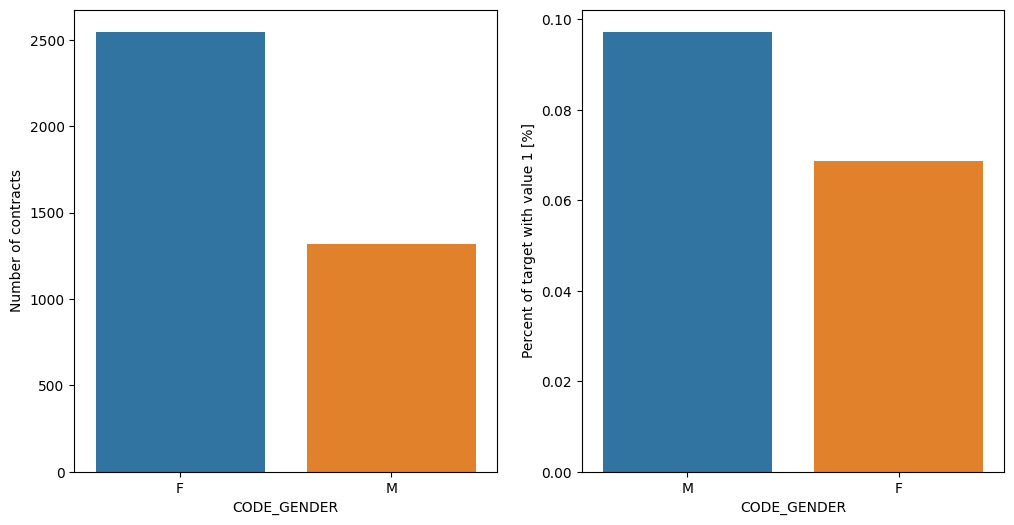

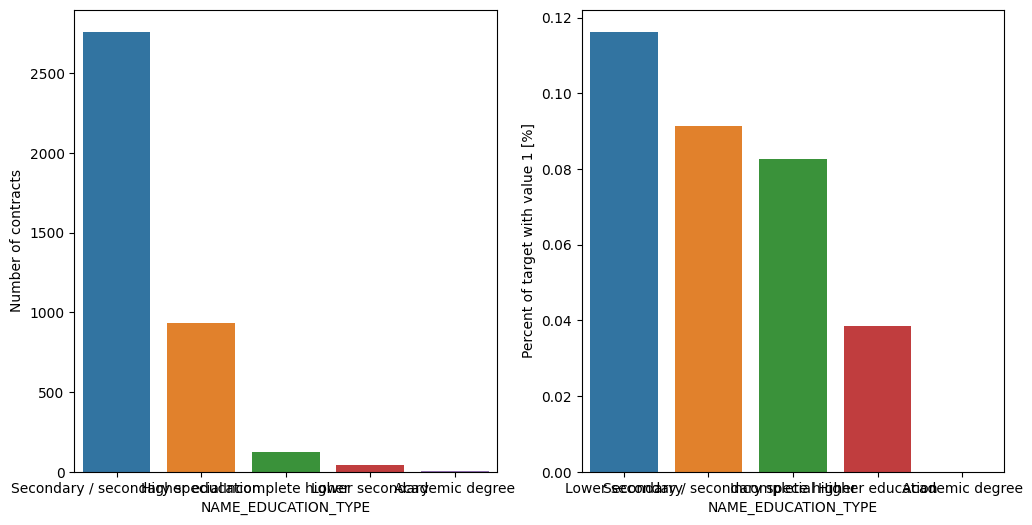

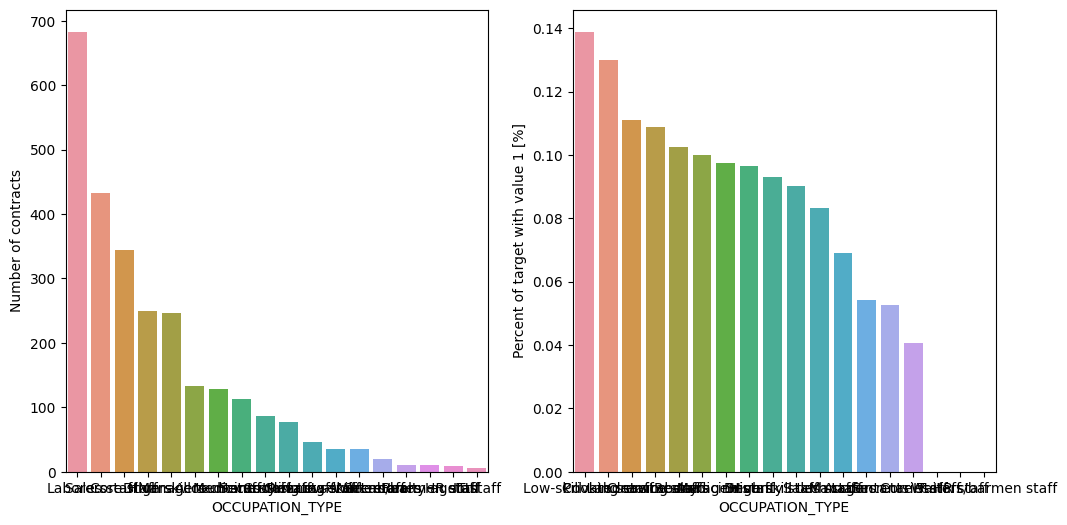

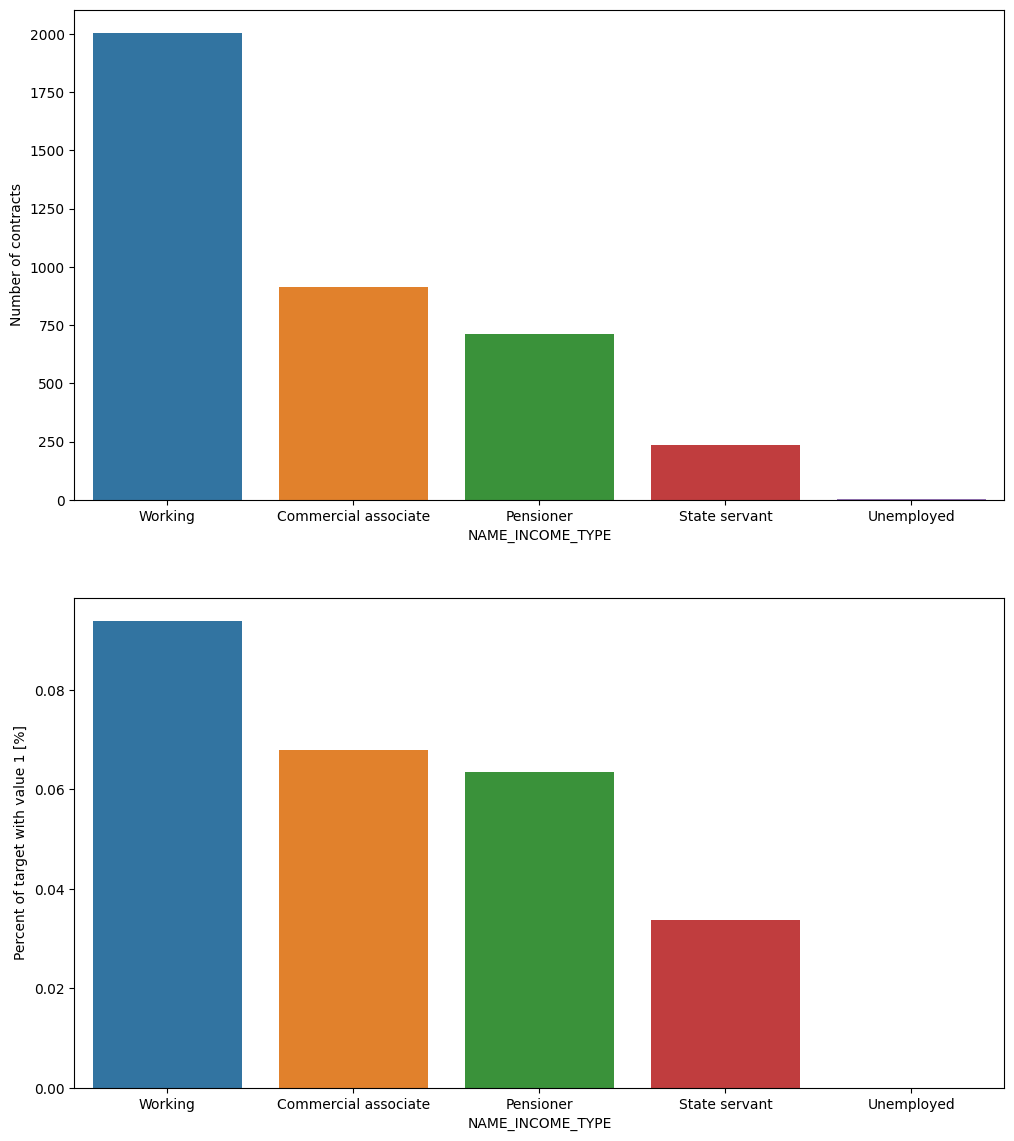

<ipython-input-17-62bc684fcb61>:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature].dropna(),color=color, kde=True,bins=100)


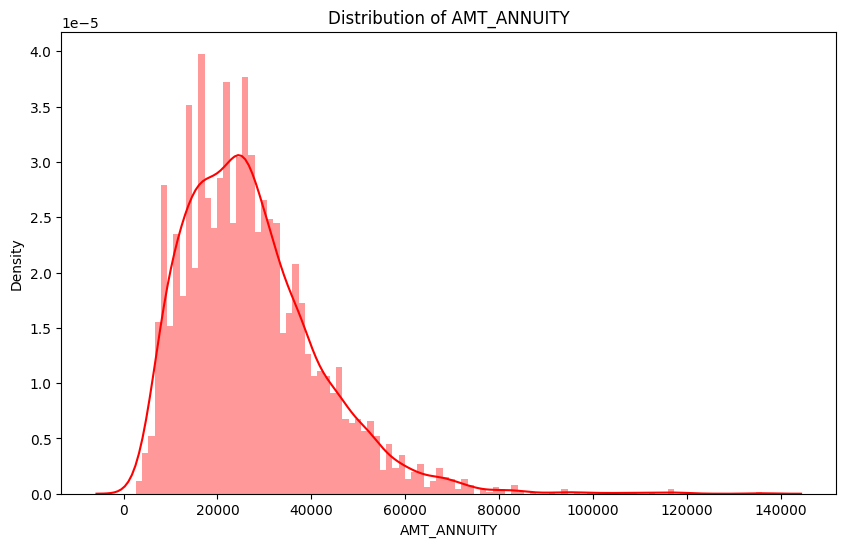

In [21]:
# 1. Unbalanced by target
# 2. too many missing values
j=0
for i in range(len(missing_values)):
    if missing_values.iloc[i,1] > 50:
        j = j + 1

df = pd.DataFrame({'labels': ['above 50 percent', 'below 50%'],
                   'features': [j, len(missing_values)-j]
                  })
plt.title('Missing value')
sns.barplot(x = 'labels', y="features", data=df)
plt.show()

# 3. some st
plot_stats('CODE_GENDER')
plot_stats('NAME_EDUCATION_TYPE')
plot_stats('OCCUPATION_TYPE')
plot_stats('NAME_INCOME_TYPE',False,False)
plot_distribution('AMT_ANNUITY', 'red')